In [73]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [74]:
# filepath = "20-11-58.csv"
filepath = "20-27-48.csv"
df = pd.read_csv(filepath)

distance, flashing = df.iloc[:, 0], df.iloc[:, 1]

In [75]:
# Get start/stop indices
start_indices = flashing[flashing == 'Start'].index
stop_indices = flashing[flashing == 'Stop'].index

# Get flashing indices
flashing_on_indices = flashing[flashing == 'Flashing On'].index
flashing_off_indices = flashing[flashing == 'Flashing Off'].index

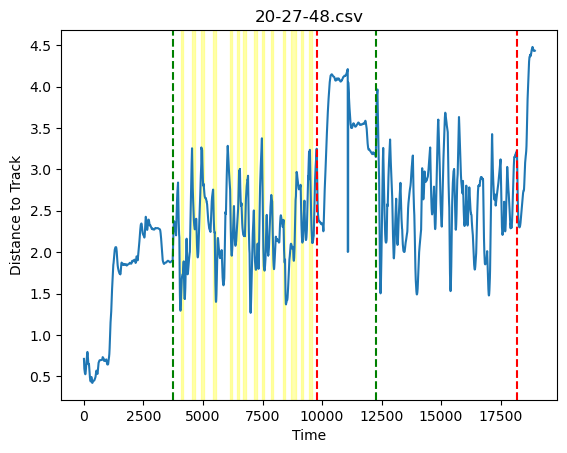

In [76]:
plt.plot(distance, label='Distance')

plt.title(filepath)
plt.xlabel('Time')
plt.ylabel('Distance to Track')

# Plot start/stop
for start_idx in start_indices:
    plt.axvline(x=start_idx, color='green', linestyle='--', label='Start')
for stop_idx in stop_indices:
    plt.axvline(x=stop_idx, color='red', linestyle='--', label='Stop')

# Highlight flashing periods
for start, end in zip(flashing_on_indices, flashing_off_indices):
    plt.axvspan(start, end, color='yellow', alpha=0.3, label='Flashing On')

plt.show()